In [17]:
import os
import numpy as np
import tensorflow as tf
import autokeras as ak
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Check if TensorFlow detects a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# File paths for the Fake and Real image directories
fake_dir = '/home/michael/Documenti/Milinda_Githubproject/Forge_Image_Orginal/Fake/'
real_dir = '/home/michael/Documenti/Milinda_Githubproject/Forge_Image_Orginal/Real/'

# Prepare the data
def prepare_data(fake_dir, real_dir, img_size=(256, 256)):
    images = []
    image_paths = []
    labels = []

    # Fake images
    for img_name in os.listdir(fake_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(fake_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img = image.img_to_array(img)
            img /= 255.0  # Normalize the images
            images.append(img)
            labels.append(0)  # Fake = 0
            image_paths.append(img_path)

    # Real images
    for img_name in os.listdir(real_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(real_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img = image.img_to_array(img)
            img /= 255.0  # Normalize the images
            images.append(img)
            labels.append(1)  # Real = 1
            image_paths.append(img_path)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, image_paths

# Load and prepare the data
x_data, y_data, image_paths = prepare_data(fake_dir, real_dir)

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test, image_paths_train, image_paths_test = train_test_split(x_data, y_data, image_paths, test_size=0.2, random_state=42)

# Initialize the AutoKeras ImageClassifier
clf = ak.ImageClassifier(overwrite=True, max_trials=3)  # max_trials sets the number of models to try

# Train the classifier
clf.fit(x_train, y_train, epochs=10)  # Increase epochs to train longer if needed

# Evaluate the classifier
test_loss, test_acc = clf.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
# Evaluate the model on the test data
test_loss, test_acc = clf.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# Predict with the best model
y_pred = clf.predict(x_test)
print(f"Predicted labels: {y_pred[:5].flatten()}")
print(f"True labels: {y_test[:5]}")


Trial 3 Complete [00h 03m 21s]
val_loss: 0.700515866279602

Best val_loss So Far: 0.700515866279602
Total elapsed time: 00h 04m 34s
Epoch 1/10


2024-09-04 16:46:04.892615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype float and shape [128,256,256,3]
	 [[{{node Placeholder/_13}}]]
2024-09-04 16:46:04.892834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64 and shape [128]
	 [[{{node Placeholder/_5}}]]
2024-09-04 16:46:05.062355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shap

4/4 [==============================] - 42s 5s/step - loss: 0.7284 - accuracy: 0.4531
Epoch 2/10
4/4 [==============================] - 21s 5s/step - loss: 0.7130 - accuracy: 0.4844
Epoch 3/10
4/4 [==============================] - 21s 5s/step - loss: 0.6865 - accuracy: 0.5078
Epoch 4/10
4/4 [==============================] - 21s 5s/step - loss: 0.6644 - accuracy: 0.5938
Epoch 5/10
4/4 [==============================] - 21s 5s/step - loss: 0.6652 - accuracy: 0.5938
Epoch 6/10
4/4 [==============================] - 21s 5s/step - loss: 0.6484 - accuracy: 0.6719
Epoch 7/10
4/4 [==============================] - 21s 5s/step - loss: 0.6387 - accuracy: 0.6719
Epoch 8/10
4/4 [==============================] - 21s 5s/step - loss: 0.6173 - accuracy: 0.7109
Epoch 9/10
4/4 [==============================] - 21s 5s/step - loss: 0.6295 - accuracy: 0.7031
Epoch 10/10
4/4 [==============================] - 21s 5s/step - loss: 0.5991 - accuracy: 0.7422


2024-09-04 16:50:06.573655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-09-04 16:50:06.586573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2024-09-04 16:50:06.595633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,32]
	 [[{{node inputs}}]]
2024-09-04 16:5

INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [14]:
# Evaluate the model on the test data
test_loss, test_acc = clf.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# Predict with the best model
y_pred = clf.predict(x_test)
print(f"Predicted labels: {y_pred[:5].flatten()}")
print(f"True labels: {y_test[:5]}")

1/1 [==============================] - 0s 185ms/step - loss: 1.6715 - accuracy: 0.0938


2024-09-04 16:40:41.578444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [32,256,256,3]
	 [[{{node Placeholder/_0}}]]
2024-09-04 16:40:41.578574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64 and shape [32]
	 [[{{node Placeholder/_18}}]]


Test Accuracy: 0.094


2024-09-04 16:40:41.882838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [32,256,256,3]
	 [[{{node Placeholder/_0}}]]
2024-09-04 16:40:41.882929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [32,256,256,3]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 110ms/step
Predicted labels: [0. 0. 0. 1. 0.]
True labels: [1 1 1 0 1]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.0938
Precision: 0.1579
Recall: 0.1875
F1 Score: 0.1714


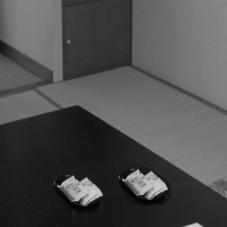

True Label: Fake
Predicted Label: Real


In [16]:
# Take one image from the test data, show it, and display the label and prediction
sample_index = 10  # You can change this index to display a different image

sample_image_path = image_paths_test[sample_index]
true_label = y_test[sample_index]

# Convert predicted_label to a scalar if it's a numpy array
predicted_label = y_pred[sample_index]
if isinstance(predicted_label, np.ndarray):
    predicted_label = predicted_label.item()

# Convert label numbers to human-readable labels
label_map = {0: 'Fake', 1: 'Real'}
true_label_text = label_map[true_label]
predicted_label_text = label_map[predicted_label]

# Display the image
display(IPImage(filename=sample_image_path))

# Print the true label and predicted label
print(f"True Label: {true_label_text}")
print(f"Predicted Label: {predicted_label_text}")
